# Imports

In [13]:
from urllib.request import urlopen
test_images = urlopen("https://web.mit.edu/torralba/www/TestImages.txt").read().decode('utf-8').split()
train_images = urlopen("https://web.mit.edu/torralba/www/TrainImages.txt").read().decode('utf-8').split()

from os import path, listdir

import cv2
from PIL import Image

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
layers = tf.keras.layers

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

tf.config.optimizer.set_jit(True)


In [15]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# Read Data

In [2]:
data = []
labels = []

size = (128, 128)

for category in listdir("./Data/Images"):
    for image in listdir(f"./Data/Images/{category}"):
        try:
            filepath = path.join(f"./Data/Images/{category}/{image}")
            # filepath
            img = cv2.imread(filepath)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, size)
            img = img / 255.0
            data.append(img)
            labels.append(category)
        except Exception as e:
            print(filepath, e, img)
            # try:
            #     filepath = path.join(f"./Data/Images/{category}/{image}")
            #     img = Image.open(filepath)
            #     img = img.resize(size)
            #     img = np.array(img)
            #     img = img / 255.0
            #     data.append(img)
            #     labels.append(category)
            # except Exception as e:
            #     print(filepath, e, img)
data = np.array(data)
labels = np.array(labels)

./Data/Images/bar/bar_0527.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
 None
./Data/Images/buffet/Buffet_Lettuce_gif.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
 None
./Data/Images/buffet/Buffet_Set_Up_2_gif.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
 None
./Data/Images/buffet/Buffet_Set_Up_gif.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
 None
./Data/Images/closet/closet_design_lg_gif.jpg OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed

In [3]:
labels.shape

(15590,)

In [4]:
data.shape

(15590, 128, 128, 3)

# Transform Data

In [5]:
string = labels.copy()
string = string[sorted(np.unique(string, return_index=True)[1])]
str_to_int = dict(zip(string, range(len(string))))
int_to_str = dict(zip(range(len(string)), string))


In [6]:
labels


array(['airport_inside', 'airport_inside', 'airport_inside', ...,
       'winecellar', 'winecellar', 'winecellar'], dtype='<U19')

In [7]:
def transform(x):
    return str_to_int[x]
if labels.dtype == "<U19":
    labels = np.array(list(map(transform, labels)))
labels

array([ 0,  0,  0, ..., 66, 66, 66])

In [8]:
# data = data[...,::-1]

# Split Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

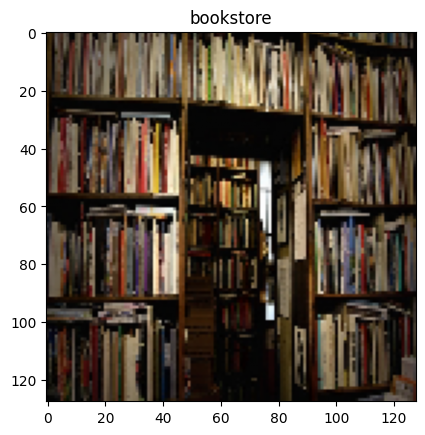

In [10]:
integer = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[integer])
plt.title(int_to_str[np.argmax(y_train[integer])])
plt.show()

# Help Fuctions

In [18]:
def display_history(history, names, title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()
    plt.show()

def predict_random(model, data_x=X_test, data_y=y_test):
    choose = np.random.randint(0, data_x.shape[0])
    plt.imshow(data_x[choose])
    predictions = model.predict(data_x)
    # plt.title(f'Predicted Object: {np.argmax(predictions[choose]) + 1} | Real Object: {np.argmax(data_y[choose]) + 1}')
    plt.title(f'Predicted Object: {int_to_str[np.argmax(predictions[choose]) + 1]} | Real Object: {int_to_str[np.argmax(data_y[choose]) + 1]}')

def predict(model, batch_size=128, epochs=20, val_split=0.2):
    # history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    if isinstance(val_split, float):
        history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    elif isinstance(val_split, tuple):
        history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=val_split)
    display_history(history, ['loss', 'val_loss'], "Loss")
    display_history(history, ['accuracy', 'val_accuracy'], "Accuracy")
    model.evaluate(X_test, y_test)
    predict_random(model, X_test, y_test)

# Baseline

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,407,107 (32.07 MB)

 Trainable params: 8,407,043 (32.07 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 80s 974ms/step - Top2: 0.0635 - accuracy: 0.0323 - loss: 6.2820 - val_Top2: 0.0914 - val_accuracy: 0.0489 - val_loss: 4.1762
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 76s 969ms/step - Top2: 0.1009 - accuracy: 0.0544 - loss: 4.1492 - val_Top2: 0.0986 - val_accuracy: 0.0537 - val_loss: 4.1510
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - Top2: 0.1121 - accuracy: 0.0615 - loss: 4.1073 - val_Top2: 0.1222 - val_accuracy: 0.0525 - val_loss: 4.0544
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 77s 984ms/step - Top2: 0.1292 - accuracy: 0.0680 - loss: 4.0090 - val_Top2: 0.1319 - val_accuracy: 0.0806 - val_loss: 3.9764
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 67s 856ms/step - Top2: 0.1291 - accuracy: 0.0734 - loss: 3.9246 - val_Top2: 0.1543 - val_accuracy: 0.0862 - val_loss: 3.9182
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 71s 916ms/step - Top2: 0.1514 - accuracy: 0.0865 - loss: 3.8745 - val_Top2: 0.1555 - val_accuracy: 0.0834 - val_loss: 3.9249
Epoch 7/20
78/78 ━━━━━━━━

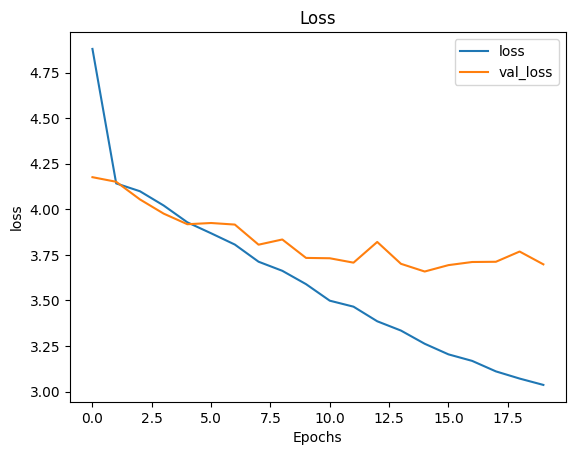

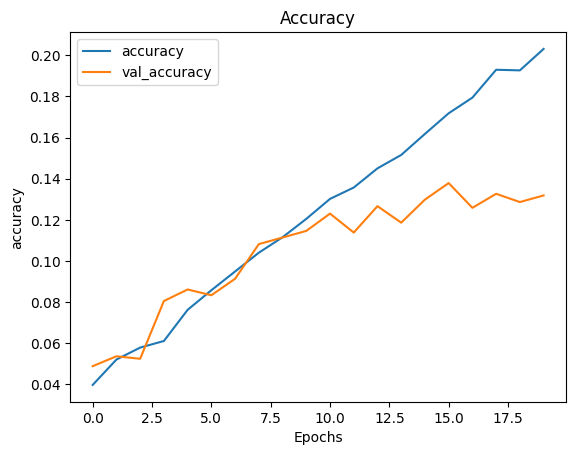

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - Top2: 0.2088 - accuracy: 0.1299 - loss: 3.7070
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


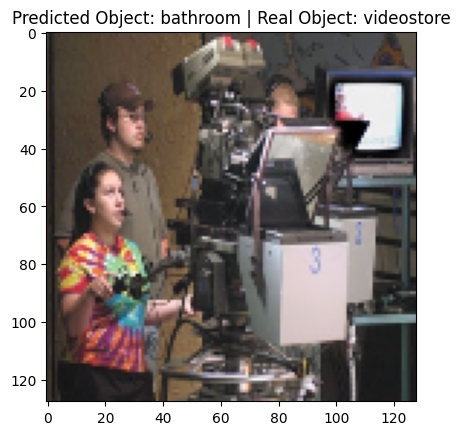

In [19]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Bigger Num of Filters in conv2D

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Large Num of Filters in conv2D

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# More Conv2D

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Even More Conv2D

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Elu instead of Relu

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='elu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='elu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Gelu instead of Relu

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='gelu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='gelu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Dropout after first conv2D

In [ ]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

# Some Depreceated Things

In [ ]:
# data = []
# for train_image in train_images:
#     try:
#         filepath = path.join(f"./Data/Images/{train_image}")
#         # filepath
#         img = cv2.imread(filepath)
#         img = cv2.resize(img, (256, 256))  # Resize if needed
#         img = img / 255.0  # Normalize
#         data.append(img)
#     except Exception as e:
#         print(filepath, e)
# train_data_x = np.array(data)

# data = []
# for test_image in test_images:
#     try:
#         filepath = path.join(f"./Data/Images/{test_image}")
#         # filepath
#         img = cv2.imread(filepath)
#         img = cv2.resize(img, (256, 256))  # Resize if needed
#         img = img / 255.0  # Normalize
#         data.append(img)
#     except Exception as e:
#         print(filepath, e)
# test_data_x = np.array(data)

In [ ]:
# test_data_x.shape, train_data_x.shape

In [ ]:
# plt.imshow(test_data_x[np.random.randint(0, test_data_x.shape[0])])
# plt.show()
# plt.imshow(train_data_x[np.random.randint(0, train_data_x.shape[0])])